# Labels

In [ ]:
import numpy as np
import pickle
with open('../../datasets/surgvu/labels/1fps/train.pkl', 'rb') as f:
    obj = pickle.load(f)


In [2]:
obj.keys()

dict_keys(['case_000_video_part_001', 'case_001_video_part_001', 'case_002_video_part_001', 'case_002_video_part_002', 'case_003_video_part_001', 'case_003_video_part_002', 'case_004_video_part_001', 'case_004_video_part_002', 'case_006_video_part_001', 'case_006_video_part_002', 'case_007_video_part_001', 'case_007_video_part_002', 'case_011_video_part_001', 'case_011_video_part_002', 'case_012_video_part_001', 'case_012_video_part_002', 'case_015_video_part_001', 'case_016_video_part_001', 'case_016_video_part_002', 'case_019_video_part_001', 'case_020_video_part_001', 'case_020_video_part_002', 'case_022_video_part_001', 'case_022_video_part_002', 'case_024_video_part_001', 'case_024_video_part_002', 'case_025_video_part_001', 'case_025_video_part_002', 'case_026_video_part_001', 'case_026_video_part_002', 'case_029_video_part_001', 'case_030_video_part_001', 'case_030_video_part_002', 'case_031_video_part_001', 'case_031_video_part_002', 'case_035_video_part_001', 'case_037_video_p

In [3]:
obj['case_129_video_part_001']

[{'unique_id': 1291000001,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00001.jpg'},
 {'unique_id': 1291000002,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00002.jpg'},
 {'unique_id': 1291000003,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00003.jpg'},
 {'unique_id': 1291000004,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00004.jpg'},
 {'unique_id': 1291000005,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00005.jpg'},
 {'unique_id': 1291000006,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00006.jpg'},
 {'unique_id': 1291000007,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00007.jpg'},
 {'unique_id': 1291000008,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00008.jpg'},
 {'unique_id': 1291000009,
  'case': 'case_129',
  'part': 1,
  'phase': 0,
  'file_name': 'frame_00009.jpg'},
 

# Sampling

In [ ]:
import os, pickle
from collections import OrderedDict

N = 3  

def sort_key(item):
    return item["file_name"]

In [ ]:
def sample_pickle(PKL_IN_PATH, PKL_OUT_PATH, N=3):
    print(PKL_IN_PATH, "->", PKL_OUT_PATH, "stride:", N)
    with open(PKL_IN_PATH, "rb") as f:
        data = pickle.load(f)

    assert isinstance(data, dict), f"Expected dict, got: {type(data)}"
    print("Example keys:", list(data.keys())[:5], "…")

    out_data = OrderedDict()
    total_before, total_after = 0, 0
    for case, items in sorted(data.items()):
        items_sorted = sorted(items, key=sort_key)
        keep = items_sorted[::N]   
        if keep:               
            out_data[case] = keep
            total_before += len(items_sorted)
            total_after  += len(keep)

    print(f"[DONE] cases: in={len(data)} out={len(out_data)} | frames: in={total_before} → out={total_after} (x{total_after/max(1,total_before):.3f})")
    with open(PKL_OUT_PATH, "wb") as f:
        pickle.dump(out_data, f)



In [ ]:
sample_pickle("../../datasets/surgvu/labels/1fps/test.pkl", "../../datasets/surgvu/labels/0_3fps/test.pkl", N)
sample_pickle("../../datasets/surgvu/labels/1fps/train.pkl", "../../datasets/surgvu/labels/0_3fps/train.pkl", N)
sample_pickle("../../datasets/surgvu/labels/1fps/train_12p5.pkl", "../../datasets/surgvu/labels/0_3fps/train_12p5.pkl", N)
sample_pickle("../../datasets/surgvu/labels/1fps/train_25.pkl", "../../datasets/surgvu/labels/0_3fps/train_25.pkl", N)
sample_pickle("../../datasets/surgvu/labels/1fps/val.pkl", "../../datasets/surgvu/labels/0_3fps/val.pkl", N)

In [4]:
# Count total frames in pickle files
import pickle

def count_frames_in_pickle(pkl_path):
    """Count total number of frames in a pickle file."""
    with open(pkl_path, 'rb') as f:
        data = pickle.load(f)
    
    total_frames = 0
    for case_name, items in data.items():
        total_frames += len(items)
    
    return total_frames


# 1fps labels
fps_1_files = {
    "test": "../../datasets/surgvu/labels/1fps/test.pkl",
    "train": "../../datasets/surgvu/labels/1fps/train.pkl",
    "val": "../../datasets/surgvu/labels/1fps/val.pkl"
}

print("=" * 60)
print("📊 FRAME COUNTS - 1fps")
print("=" * 60)

total_1fps = 0
for split_name, pkl_path in fps_1_files.items():
    count = count_frames_in_pickle(pkl_path)
    total_1fps += count
    print(f"{split_name:6s}: {count:6d} frames")

print("-" * 60)
print(f"{'TOTAL':6s}: {total_1fps:6d} frames")
print()

# 0.3fps labels
fps_03_files = {
    "test": "../../datasets/surgvu/labels/0_3fps/test.pkl",
    "train": "../../datasets/surgvu/labels/0_3fps/train.pkl",
    "val": "../../datasets/surgvu/labels/0_3fps/val.pkl"
}

print("=" * 60)
print("📊 FRAME COUNTS - 0.3fps")
print("=" * 60)

total_03fps = 0
for split_name, pkl_path in fps_03_files.items():
    count = count_frames_in_pickle(pkl_path)
    total_03fps += count
    print(f"{split_name:6s}: {count:6d} frames")

print("-" * 60)
print(f"{'TOTAL':6s}: {total_03fps:6d} frames")
print()

# Summary comparison
print("=" * 60)
print("📈 SUMMARY COMPARISON")
print("=" * 60)
print(f"1fps total:   {total_1fps:6d} frames")
print(f"0.3fps total: {total_03fps:6d} frames")
print(f"Ratio:        {total_1fps/total_03fps:.2f}x")
print(f"Reduction:    {(1 - total_03fps/total_1fps)*100:.1f}%")

📊 FRAME COUNTS - 1fps
test  : 348290 frames
train : 1648668 frames
val   : 330876 frames
------------------------------------------------------------
TOTAL : 2327834 frames

📊 FRAME COUNTS - 0.3fps
test  : 116110 frames
train : 549619 frames
val   : 110305 frames
------------------------------------------------------------
TOTAL : 776034 frames

📈 SUMMARY COMPARISON
1fps total:   2327834 frames
0.3fps total: 776034 frames
Ratio:        3.00x
Reduction:    66.7%


In [5]:
# Analyze class distribution for 0.3fps labels
import pickle
from collections import Counter

def analyze_class_distribution(pkl_files, fps_name="0.3fps"):
    """Analyze distribution of 'Other' vs other classes."""
    
    print("=" * 60)
    print(f"📊 CLASS DISTRIBUTION ANALYSIS - {fps_name}")
    print("=" * 60)
    
    all_labels = []
    split_stats = {}
    
    # Collect labels from all splits
    for split_name, pkl_path in pkl_files.items():
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
        
        split_labels = []
        for case_name, items in data.items():
            for item in items:
                if 'phase' in item and item['phase'] is not None:
                    split_labels.append(item['phase'])
        
        split_stats[split_name] = split_labels
        all_labels.extend(split_labels)
    
    # Count occurrences
    total_frames = len(all_labels)
    class_counts = Counter(all_labels)
    
    # Calculate Other (class 0) vs rest
    other_count = class_counts.get(0, 0)
    other_classes_count = total_frames - other_count
    
    print(f"\n🔢 Overall Statistics:")
    print(f"  Total frames:        {total_frames:6d}")
    print(f"  Other (class 0):     {other_count:6d}  ({other_count/total_frames*100:5.1f}%)")
    print(f"  Other classes (1-7): {other_classes_count:6d}  ({other_classes_count/total_frames*100:5.1f}%)")
    
    print(f"\n📋 Per-class breakdown:")
    for class_id in sorted(class_counts.keys()):
        count = class_counts[class_id]
        percentage = (count / total_frames) * 100
        class_name = "Other" if class_id == 0 else f"Class {class_id}"
        print(f"  {class_name:15s}: {count:6d}  ({percentage:5.1f}%)")
    
    print(f"\n📂 Per-split statistics:")
    for split_name in ['test', 'train', 'val']:
        if split_name in split_stats:
            split_labels = split_stats[split_name]
            split_total = len(split_labels)
            split_counts = Counter(split_labels)
            split_other = split_counts.get(0, 0)
            split_rest = split_total - split_other
            
            print(f"\n  {split_name.upper()}:")
            print(f"    Total:              {split_total:6d}")
            print(f"    Other (class 0):    {split_other:6d}  ({split_other/split_total*100:5.1f}%)")
            print(f"    Other classes (1-7): {split_rest:6d}  ({split_rest/split_total*100:5.1f}%)")
    
    return class_counts

# Analyze 0.3fps labels
fps_03_files = {
    "test": "../../datasets/surgvu/labels/0_3fps/test.pkl",
    "train": "../../datasets/surgvu/labels/0_3fps/train.pkl",
    "val": "../../datasets/surgvu/labels/0_3fps/val.pkl"
}

class_distribution = analyze_class_distribution(fps_03_files, "0.3fps")

📊 CLASS DISTRIBUTION ANALYSIS - 0.3fps

🔢 Overall Statistics:
  Total frames:        776034
  Other (class 0):     527796  ( 68.0%)
  Other classes (1-7): 248238  ( 32.0%)

📋 Per-class breakdown:
  Other          : 527796  ( 68.0%)
  Class 1        :  90154  ( 11.6%)
  Class 2        :  52355  (  6.7%)
  Class 3        :  44849  (  5.8%)
  Class 4        :  28962  (  3.7%)
  Class 5        :  18366  (  2.4%)
  Class 6        :   7063  (  0.9%)
  Class 7        :   6489  (  0.8%)

📂 Per-split statistics:

  TEST:
    Total:              116110
    Other (class 0):     77264  ( 66.5%)
    Other classes (1-7):  38846  ( 33.5%)

  TRAIN:
    Total:              549619
    Other (class 0):    373978  ( 68.0%)
    Other classes (1-7): 175641  ( 32.0%)

  VAL:
    Total:              110305
    Other (class 0):     76554  ( 69.4%)
    Other classes (1-7):  33751  ( 30.6%)



=== Dataset overview ===
  split                     case        file_name  phase frame_time  label
0  test  case_009_video_part_001  frame_00001.jpg      0       None  Other
1  test  case_009_video_part_001  frame_00004.jpg      0       None  Other
2  test  case_009_video_part_001  frame_00007.jpg      0       None  Other
3  test  case_009_video_part_001  frame_00010.jpg      0       None  Other
4  test  case_009_video_part_001  frame_00013.jpg      0       None  Other

Label distribution:
label
Other                                 527796
Suturing                               90154
Uterine horn                           52355
Rectal artery/vein                     44849
Suspensory ligaments                   28962
Skills application                     18366
Retraction and collision avoidance      7063
Range of motion                         6489
Name: count, dtype: int64

Total frames: 776034
Labeled frames: 248238 (31.99%)
Other frames: 527796 (68.01%)


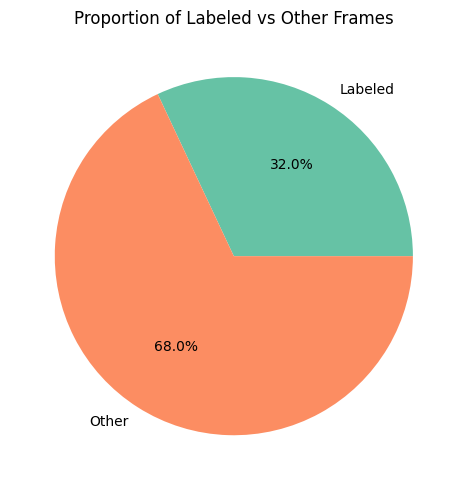

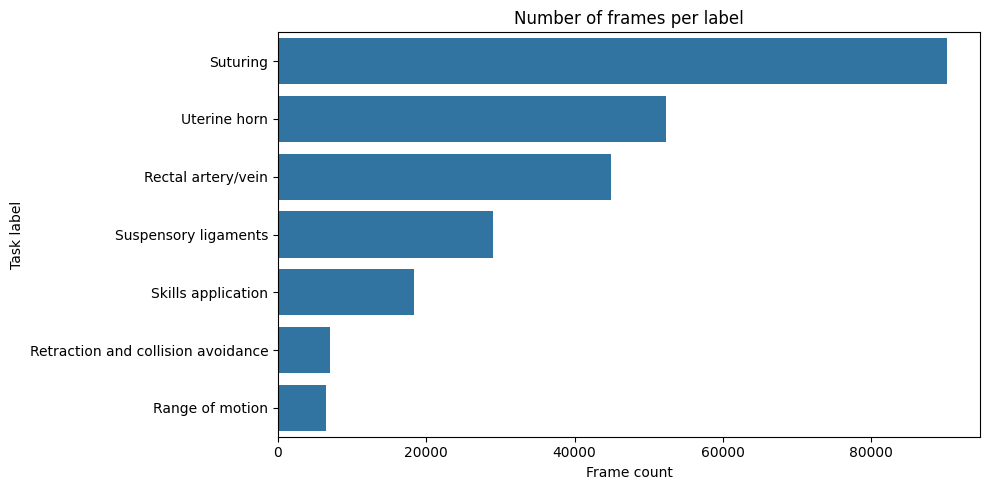

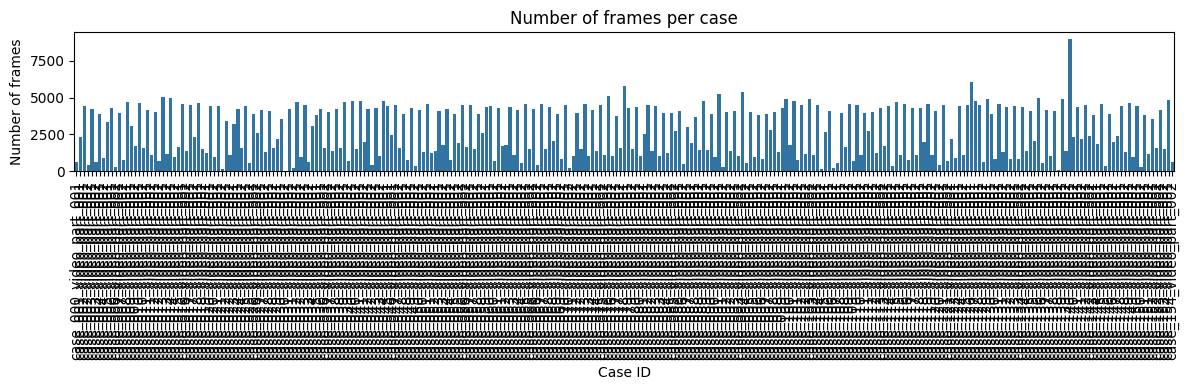

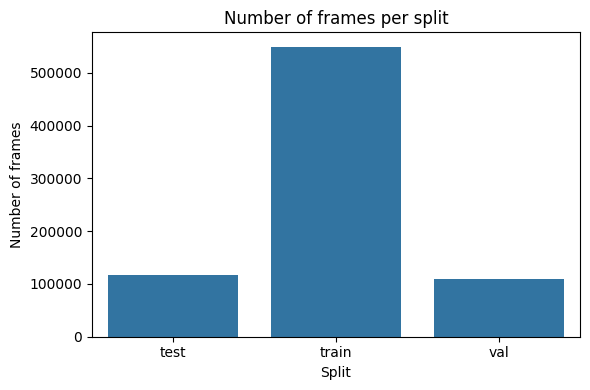


✅ All visualizations completed!


In [7]:
# Visualize dataset statistics for 0.3fps labels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load 0.3fps pickle files
fps_03_files = {
    "test": "../../datasets/surgvu/labels/0_3fps/test.pkl",
    "train": "../../datasets/surgvu/labels/0_3fps/train.pkl",
    "val": "../../datasets/surgvu/labels/0_3fps/val.pkl"
}

# Convert pickle data to DataFrame
def pickle_to_dataframe(pkl_files):
    """Convert pickle files to a single pandas DataFrame."""
    all_data = []
    
    for split_name, pkl_path in pkl_files.items():
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
        
        for case_name, items in data.items():
            for item in items:
                row = {
                    'split': split_name,
                    'case': case_name,
                    'file_name': item.get('file_name', ''),
                    'phase': item.get('phase', None),
                    'frame_time': item.get('frame_time', None)
                }
                all_data.append(row)
    
    return pd.DataFrame(all_data)

# Create DataFrame
df = pickle_to_dataframe(fps_03_files)

# Map phase IDs to names
phase_names = {
    0: 'Other',
    1: 'Suturing',
    2: 'Uterine horn',
    3: 'Rectal artery/vein',
    4: 'Suspensory ligaments',
    5: 'Skills application',
    6: 'Retraction and collision avoidance',
    7: 'Range of motion'
}
df['label'] = df['phase'].map(phase_names)

# === 1. Basic info ===
print("\n=== Dataset overview ===")
print(df.head())
print("\nLabel distribution:")
print(df['label'].value_counts())

# === 2. Number of labeled vs. Other frames ===
label_counts = df['label'].value_counts()
num_labeled = df[df['label'] != 'Other'].shape[0]
num_other = df[df['label'] == 'Other'].shape[0]
total = len(df)

print(f"\nTotal frames: {total}")
print(f"Labeled frames: {num_labeled} ({num_labeled / total:.2%})")
print(f"Other frames: {num_other} ({num_other / total:.2%})")

# === 3. Pie chart for labeled vs. Other ===
plt.figure(figsize=(5, 5))
plt.pie(
    [num_labeled, num_other],
    labels=["Labeled", "Other"],
    autopct="%1.1f%%",
    colors=["#66c2a5", "#fc8d62"]
)
plt.title("Proportion of Labeled vs Other Frames")
plt.tight_layout()
plt.show()

# === 4. Frames per label (excluding "Other") ===
df_labeled = df[df['label'] != 'Other']
label_distribution = df_labeled['label'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=label_distribution.values, y=label_distribution.index)
plt.title("Number of frames per label")
plt.xlabel("Frame count")
plt.ylabel("Task label")
plt.tight_layout()
plt.show()

# === 5. Frames per case ===
case_distribution = df['case'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
sns.barplot(x=case_distribution.index, y=case_distribution.values)
plt.title("Number of frames per case")
plt.xlabel("Case ID")
plt.ylabel("Number of frames")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# === 6. Frames per split ===
split_distribution = df['split'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=split_distribution.index, y=split_distribution.values)
plt.title("Number of frames per split")
plt.xlabel("Split")
plt.ylabel("Number of frames")
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✅ All visualizations completed!")
print("=" * 70)

# Calculate weights

In [ ]:
import numpy as np
import pickle
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

def compute_class_weights(pkl_path, label_key="phase"):
    """
    Calculates class weights based on the distribution of labels in train.pkl
    
    Args:
        pkl_path: path to the pickle file
        label_key: label key (e.g., "phase")
    
    Returns:
        dict: {class_id: weight}
    """
    print(f"Calculating class weights from: {pkl_path}")
    
    with open(pkl_path, 'rb') as f:
        data = pickle.load(f)
    
    # Collect all labels
    all_labels = []
    for case_name, items in data.items():
        for item in items:
            if label_key in item and item[label_key] is not None:
                all_labels.append(item[label_key])
    
    all_labels = np.array(all_labels)
    print(f"Found {len(all_labels)} samples")
    
    # Count occurrences of each class
    class_counts = Counter(all_labels)
    unique_classes = sorted(class_counts.keys())
    
    print("\n📊 Class distribution:")
    total_samples = len(all_labels)
    for class_id in unique_classes:
        count = class_counts[class_id]
        percentage = (count / total_samples) * 100
        print(f"  Class {class_id}: {count:6d} samples ({percentage:5.1f}%)")
    
    # 🔧 FIX: Convert unique_classes to numpy array
    unique_classes_array = np.array(unique_classes)
    
    # Calculate weights - method 1: sklearn
    class_weights_sklearn = compute_class_weight(
        class_weight='balanced',
        classes=unique_classes_array,  # ← Now this is a numpy array
        y=all_labels
    )
    
    
    print("\n⚖️  Class weights:")
    print("\n1. Sklearn 'balanced':")
    sklearn_weights = {class_id: weight for class_id, weight in zip(unique_classes, class_weights_sklearn)}
    for class_id, weight in sklearn_weights.items():
        print(f"  Klasa {class_id}: {weight:.4f}")
    
    
    # Return the most commonly used (sklearn balanced)
    return sklearn_weights

train_pkl_path = "../../datasets/surgvu/labels/1fps/train.pkl"
sklearn_weights = compute_class_weights(train_pkl_path, "phase")